In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

Text(0.5, 1.0, 'Background Distribution with Mean = 100')

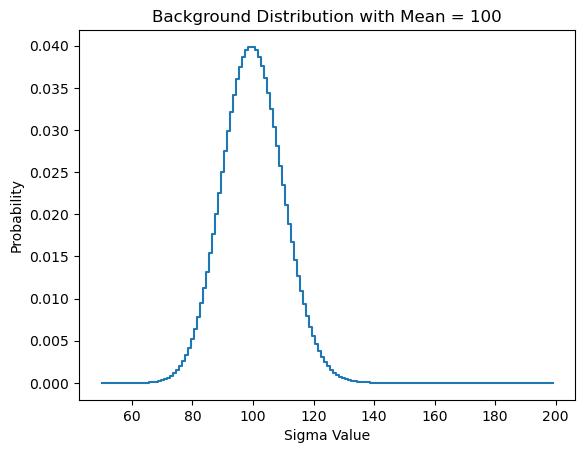

In [3]:
fig,ax = plt.subplots(1,1)
distribution = poisson(100)
x = np.arange(50,200)
dist = distribution.pmf(x)
plt.step(x,dist,where = 'mid')
plt.xlabel('Sigma Value')
plt.ylabel('Probability')
plt.title('Background Distribution with Mean = 100')

In [4]:
#5 sigma threshold
prob = norm.cdf(5)
sig5 = poisson.ppf(prob,mu=100)
sig5

154.0

### Problem 2

We have the 5 sigma threshold, now we need to see where the 8-30 sigma range lies.

In [5]:
prob8 = norm.cdf(8)
sig8 = poisson.ppf(prob8,mu=100)

prob30 = norm.cdf(30)
sig30 = poisson.ppf(prob30,mu=100)

print('The signal will lie somewhere in ' +str(sig8)+ ' to ' + str(sig30) + ' range')

The signal will lie somewhere in 190.0 to inf range


In [6]:
signal = 375
sigma = norm.isf(poisson.sf(signal,mu=100))
sigma

21.05181365776992

So the signal strengh for 21 sigma is ~21. Let's now inject this into the background distribution.

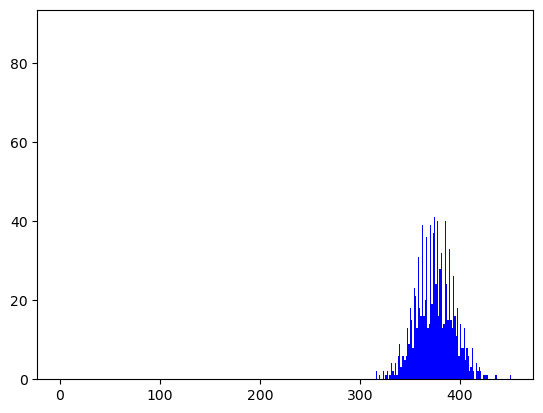

In [7]:
fig,ax = plt.subplots(1,1)
background_dist = poisson.rvs(100,size=1000)
signal_dist = poisson.rvs(signal,size=1000)
plt.hist(signal_dist,bins = 100,color='blue')
plt.hist(dist,bins = 100,color='red')
plt.show()

### Problem 3

A signal strength of 600 corresponds to a sigma value of ~34

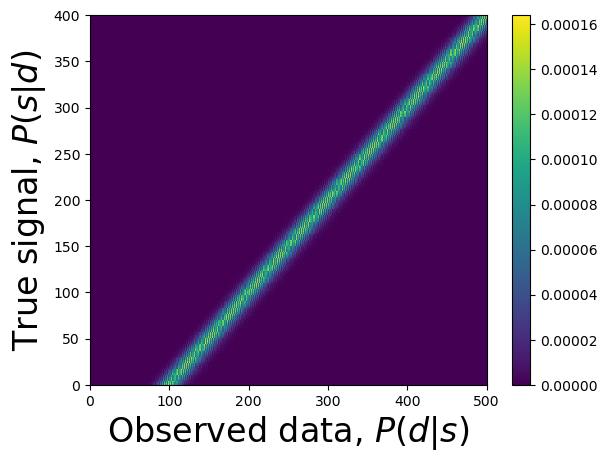

In [15]:
bkgd = poisson.rvs(mu = 100, size = 10000000)
signal = np.random.uniform(0,600,10000000)

data = bkgd + signal

signaledges = np.linspace(0,600,1200)
dataedges = np.linspace(-7,500,700)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.xlim([0,500])
plt.ylim([0,400])
plt.colorbar()

Similar to HW5, we will need to see how the plot looks for certain data. The injected signal power used in problem 2 is 375

In [19]:
data_range1 = []
length = len(data)
for i in range(length):
    if signal[i] <= 375.09 and signal[i] >= 375:    #true signal = 10
        data_range1.append(data[i])
np.mean(data_range1)

475.5036918529185

The mean of the background data is 100 and the signal that we determined before was 375, so when we added the background data, the signal was also shifted, as expected.

Now, if we reverse the problem and instead analyze the True signals given an observed data point. In this case I will choose observed data = 300

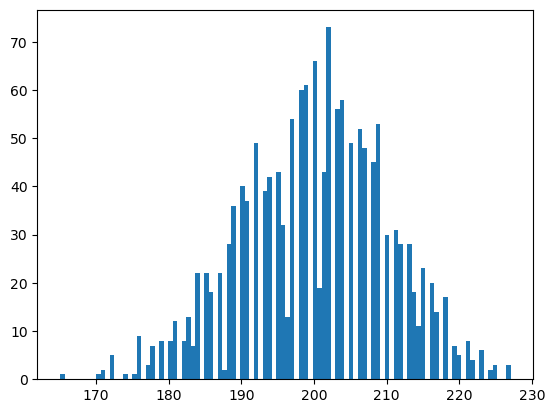

In [20]:
length = len(data)
data_range2 = []
for i in range(length):
    if data[i] <= 300.09 and data[i] >= 300:     #observed data = 10
        data_range2.append(signal[i])
plt.hist(data_range2,bins = 100)
plt.show()

Now, we will find the 1σ uncertainty on the true signal strength

In [21]:
sig1 = norm.cdf(1)
poisson.ppf(sig1,np.mean(data_range1))

497.0